In [1]:
import pandas as pd
import json
import sys

import plotly.graph_objects as go
import matplotlib.pyplot as plt

sys.path.append("..")

from src.race_data import SportStatsApi, convert_segment_time


In [2]:

with open('../data/ottawa_10k_2024.json') as f:
    data = json.load(f)
df_2024 = pd.DataFrame(pd.json_normalize(data))
df_2024['race_data.381034.rt'] = convert_segment_time(df_2024['race_data.381034.rt'])



with open('../data/ottawa_10k_2017.json') as f:
    data = json.load(f)
df_2017 = pd.DataFrame(pd.json_normalize(data))
df_2017['race_data.168800.rt'] = convert_segment_time(df_2017['race_data.168800.rt'])



In [3]:
def racetimes_hist(data, time_col, data_name):
    fig = go.Figure()
    fig.add_trace(
        go.Histogram(
            x=data[time_col],
            name=data_name

        )
    )
    fig.update_traces(opacity=0.75)

    fig.update_layout(
        barmode='overlay',
        title="10k Race Times",
        xaxis_title="Time (mins)",
        yaxis_title="Count",
        legend_title='Dataset'
    )
    return fig

In [4]:
fig_2024 = racetimes_hist(df_2024, 'race_data.381034.rt', '2024')
fig_2024.show()

In [5]:
fig = go.Figure()
fig.add_trace(
    go.Histogram(
        x=df_2024['race_data.381034.rt'],
        name='2024',
        marker_color='blue',

    )
)
fig.add_trace(
    go.Histogram(
        x=df_2017['race_data.168800.rt'],
        name='2017',
        marker_color='green',

    )
)
fig.update_traces(opacity=0.75)

fig.update_layout(
    barmode='overlay',
    title="10k Race Times",
    xaxis_title="Time (mins)",
    yaxis_title="Count",
    legend_title='Dataset'
)

fig.show()

In [6]:
def bib_highlight(df, racetime_col, bib_num, title):
    print(df[racetime_col].describe(percentiles=[0.01, 0.05, 0.1]))

    my_time = df[df['bib']==bib_num][racetime_col].values
    n, bins, patches = plt.hist(df[racetime_col], bins=60)
    my_bin = (bins<my_time).sum()
    # Change the color of the third bin (index 2)
    patches[my_bin].set_facecolor('red')
    plt.title(title)
    plt.xlabel('Time (Mins)')
    plt.ylabel('Count')
    return plt

count    3853.000000
mean       66.439647
std        13.126592
min        32.828667
1%         39.109093
5%         48.869400
10%        52.662967
50%        64.548500
max       136.711333
Name: race_data.381034.rt, dtype: float64


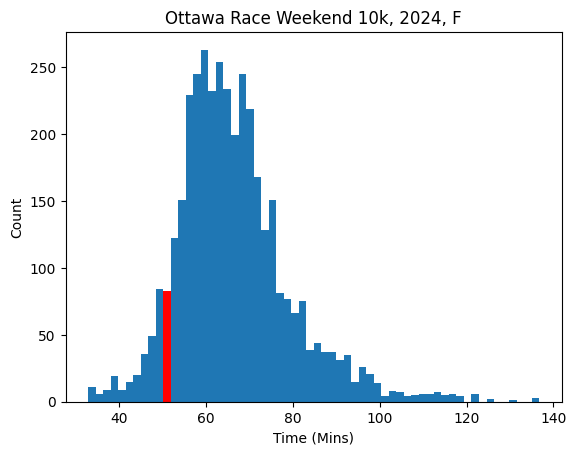

In [10]:
df_2024 = df_2024[df_2024['gender']=='f']
fig = bib_highlight(df_2024, 'race_data.381034.rt', '30482', 'Ottawa Race Weekend 10k, 2024, F')
fig.show()

count    5512.000000
mean       69.132123
std        13.243756
min        31.567333
1%         42.313802
5%         50.581483
10%        54.352400
50%        67.467583
max       132.323000
Name: race_data.168800.rt, dtype: float64


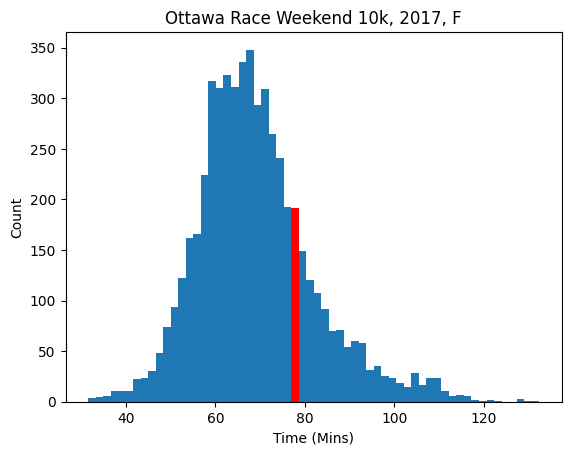

In [11]:
df_2017 = df_2017[df_2017['gender']=='f']
fig = bib_highlight(df_2017, 'race_data.168800.rt', '38966', 'Ottawa Race Weekend 10k, 2017, F')
fig.show()